# Data Preprocessing
---

In [ ]:
## Just disables the warning, doesn't take advantage of AVX/FMA to run faster
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import tensorflow

In [ ]:
import cv2,os
data_path='train/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'dogs': 0, 'cats': 1}
['dogs', 'cats']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Recale and assign catagorical lables
---

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(2000, 2)

# CNN Model
---

In [ ]:
data.shape

(2000, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

# Splittiong data into traning and testing
---

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(1800, 100, 100, 3)

In [ ]:
train_target.shape

(1800, 2)

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
45/45 [==============================] - 55s 1s/step - loss: 0.8754 - accuracy: 0.5221 - val_loss: 0.6969 - val_accuracy: 0.4861
Epoch 2/200
45/45 [==============================] - 54s 1s/step - loss: 0.6931 - accuracy: 0.4862 - val_loss: 0.6926 - val_accuracy: 0.4861
Epoch 3/200
45/45 [==============================] - 55s 1s/step - loss: 0.6927 - accuracy: 0.5041 - val_loss: 0.6908 - val_accuracy: 0.4889
Epoch 4/200
45/45 [==============================] - 53s 1s/step - loss: 0.6865 - accuracy: 0.5184 - val_loss: 0.6828 - val_accuracy: 0.5278
Epoch 5/200
45/45 [==============================] - 52s 1s/step - loss: 0.6781 - accuracy: 0.5921 - val_loss: 0.6912 - val_accuracy: 0.5250
Epoch 6/200
45/45 [==============================] - 52s 1s/step - loss: 0.6779 - accuracy: 0.5543 - val_loss: 0.7068 - val_accuracy: 0.5778
Epoch 7/200
45/45 [==============================] - 53s 1s/step - loss: 0.6367 - accuracy: 0.6461 - val_loss: 0.6881 - val_accuracy: 0.5778
Epoch 8/200
4

Epoch 59/200
45/45 [==============================] - 56s 1s/step - loss: 0.0055 - accuracy: 0.9972 - val_loss: 2.0883 - val_accuracy: 0.6167
Epoch 60/200
45/45 [==============================] - 56s 1s/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 2.1280 - val_accuracy: 0.5861
Epoch 61/200
45/45 [==============================] - 54s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.1170 - val_accuracy: 0.6083
Epoch 62/200
45/45 [==============================] - 56s 1s/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 2.0581 - val_accuracy: 0.6111
Epoch 63/200
45/45 [==============================] - 57s 1s/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 2.1504 - val_accuracy: 0.6111
Epoch 64/200
45/45 [==============================] - 57s 1s/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 2.1559 - val_accuracy: 0.6167
Epoch 65/200
45/45 [==============================] - 57s 1s/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 2.1331 - val_accuracy: 0.6000
Epoch 

45/45 [==============================] - 51s 1s/step - loss: 0.0160 - accuracy: 0.9974 - val_loss: 2.2871 - val_accuracy: 0.6167
Epoch 117/200
45/45 [==============================] - 53s 1s/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 2.3609 - val_accuracy: 0.6250
Epoch 118/200
45/45 [==============================] - 52s 1s/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 3.0309 - val_accuracy: 0.5917
Epoch 119/200
45/45 [==============================] - 51s 1s/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 2.8010 - val_accuracy: 0.5889
Epoch 120/200
45/45 [==============================] - 51s 1s/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 2.5417 - val_accuracy: 0.6083
Epoch 121/200
45/45 [==============================] - 52s 1s/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 2.7427 - val_accuracy: 0.6194
Epoch 122/200
45/45 [==============================] - 51s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.7662 - val_accuracy: 0.6167
Epoch 123/200

45/45 [==============================] - 52s 1s/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 2.6429 - val_accuracy: 0.6139
Epoch 174/200
45/45 [==============================] - 51s 1s/step - loss: 0.0226 - accuracy: 0.9952 - val_loss: 2.7556 - val_accuracy: 0.6167
Epoch 175/200
45/45 [==============================] - 52s 1s/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 2.9017 - val_accuracy: 0.6083
Epoch 176/200
45/45 [==============================] - 53s 1s/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 2.9293 - val_accuracy: 0.6194
Epoch 177/200
45/45 [==============================] - 51s 1s/step - loss: 4.9618e-04 - accuracy: 1.0000 - val_loss: 2.8402 - val_accuracy: 0.6111
Epoch 178/200
45/45 [==============================] - 51s 1s/step - loss: 5.5101e-04 - accuracy: 0.9996 - val_loss: 2.8449 - val_accuracy: 0.6083
Epoch 179/200
45/45 [==============================] - 51s 1s/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 2.6863 - val_accuracy: 0.6083
Epoch

In [ ]:
model.save('model.h5')

In [ ]:
from matplotlib import pyplot as plt

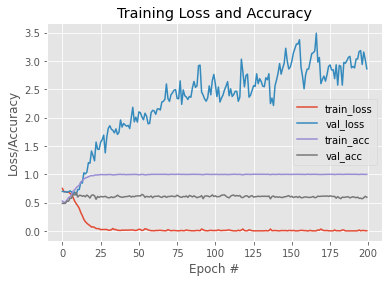

In [ ]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")